<a href="https://colab.research.google.com/github/crisdavid3335/analytics_with_KERAS/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the relevant packages
import tensorflow as tf
import tensorflow_datasets as tfds

## Downloading and preprocessing the data

In [ ]:
BUFFER_SIZE = 70_000
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [ ]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [ ]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label

In [ ]:
train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [ ]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

In [ ]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [ ]:
train_and_validation_data = train_and_validation_data.shuffle(BUFFER_SIZE)

In [ ]:
train_data = train_and_validation_data.skip(num_validation_samples)
validation_data = train_and_validation_data.take(num_validation_samples)

In [ ]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples) 
test_data = test_data.batch(num_test_samples)

## Creating the model and training it

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 5, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)])

In [ ]:
model.summary(line_length = 75)

Model: "sequential"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d (Conv2D)                 (None, 24, 24, 50)            1300        
                                                                           
 max_pooling2d (MaxPooling2D)    (None, 12, 12, 50)            0           
                                                                           
 conv2d_1 (Conv2D)               (None, 10, 10, 50)            22550       
                                                                           
 max_pooling2d_1 (MaxPooling2D)  (None, 5, 5, 50)              0           
                                                                           
 flatten (Flatten)               (None, 1250)                  0           
                                                                           
 dense (Dense)                   (None, 10)                    12510

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',    
    min_delta = 0,
    patience = 2,
    verbose = 0, 
    restore_best_weights = True
)

In [ ]:
model.fit(
    train_data, 
    epochs = NUM_EPOCHS, 
    callbacks = [early_stopping], 
    validation_data = validation_data,
    verbose = 2
)

Epoch 1/20
422/422 - 61s - loss: 0.2673 - accuracy: 0.9215 - val_loss: 0.0819 - val_accuracy: 0.9755 - 61s/epoch - 145ms/step
Epoch 2/20
422/422 - 64s - loss: 0.0716 - accuracy: 0.9787 - val_loss: 0.0599 - val_accuracy: 0.9813 - 64s/epoch - 152ms/step
Epoch 3/20
422/422 - 63s - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0495 - val_accuracy: 0.9855 - 63s/epoch - 150ms/step
Epoch 4/20
422/422 - 63s - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0349 - val_accuracy: 0.9912 - 63s/epoch - 149ms/step
Epoch 5/20
422/422 - 65s - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0305 - val_accuracy: 0.9913 - 65s/epoch - 153ms/step
Epoch 6/20
422/422 - 63s - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0240 - val_accuracy: 0.9920 - 63s/epoch - 149ms/step
Epoch 7/20
422/422 - 64s - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0196 - val_accuracy: 0.9938 - 64s/epoch - 151ms/step
Epoch 8/20
422/422 - 63s - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0167 - val_accuracy: 0.9950 - 63s/epoch - 148

## Testing our model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 3s 3s/step - loss: 0.0320 - accuracy: 0.9900


In [ ]:
print('Test loss: {0: .4f}. Test accuracy: {1: .2f}%'.format(test_loss, test_accuracy*100.))

Test loss:  0.0320. Test accuracy:  99.00%


### Plotting images and the results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
for images, labels in test_data.take(1):
  images_test = images.numpy()
  labels_test = labels.numpy()

images_plot = np.reshape(images_test, (10000,28,28))

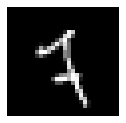

Label: 7


In [ ]:
i = 34

plt.figure(figsize = (2, 2))
plt.axis('off')
plt.imshow(images_plot[i-1], cmap = 'gray', aspect = 'auto')
plt.show()


print('Label: {}'.format(labels_test[i-1]))

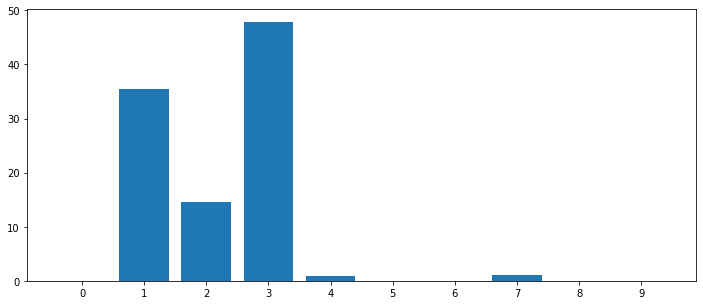

In [ ]:
predictions = model.predict(images_test[i-1:i])

probabilities = tf.nn.softmax(predictions).numpy()
probabilities = probabilities*100

plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=probabilities[0], 
        tick_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.show()